测量大小距离

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

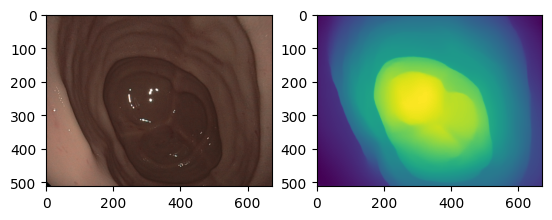

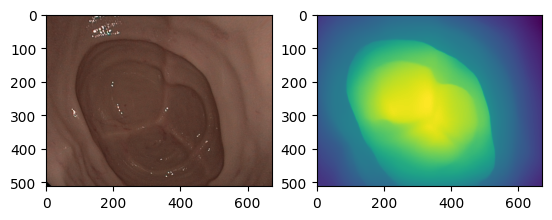

In [4]:
img1,img2 = cv2.imread("/home/jiahan/jiahan/datasets/C3VD/dataset_cecum_t1_a_4SCDepth/scenes/scene1/00111.jpg"),cv2.imread("/home/jiahan/jiahan/datasets/C3VD/dataset_cecum_t1_a_4SCDepth/scenes/scene1/00185.jpg")

disp1,disp2 = 1-cv2.imread("/home/jiahan/jiahan/datasets/C3VD/MiDas_Depth_for_SC_Depth/cecum_t1_a_finetuning/00111-dpt_beit_large_512.png",-1)/65535, 1-cv2.imread("/home/jiahan/jiahan/datasets/C3VD/MiDas_Depth_for_SC_Depth/cecum_t1_a_finetuning/00185-dpt_beit_large_512.png",-1)/65535
plt.figure()
plt.subplot(1,2,1)
plt.imshow(img1[...,::-1])
plt.subplot(1,2,2)
plt.imshow(disp1,vmin=0,vmax=1)

plt.figure()
plt.subplot(1,2,1)
plt.imshow(img2[...,::-1])
plt.subplot(1,2,2)
plt.imshow(disp2,vmin=0,vmax=1)

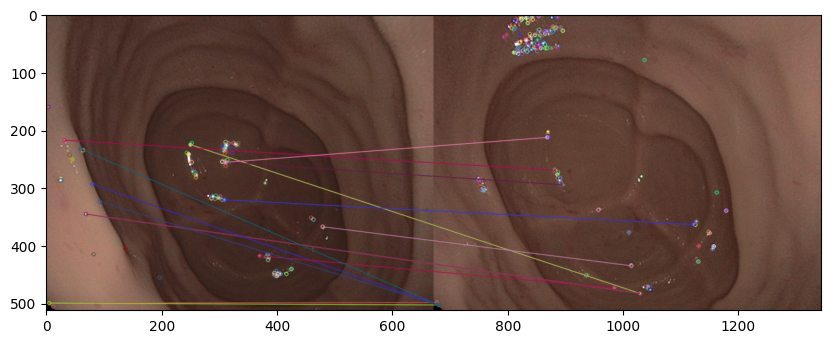

: 

In [8]:
def detactKP(img):
    # 创建orb检测器
    orb = cv2.ORB_create()
    kps = orb.detect(img)
    result = cv2.drawKeypoints(img.copy(), kps, None, -1, cv2.DrawMatchesFlags_DEFAULT)
    return result

# 创建ORB特征检测器
sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# 暴力匹配
bf = cv2.DescriptorMatcher_create(cv2.DescriptorMatcher_BRUTEFORCE)
matches = bf.match(des1,des2)

# 绘制匹配
matches = sorted(matches, key = lambda x:x.distance)
result = cv2.drawMatches(img1, kp1, img2, kp2, matches[:15], None)
plt.figure(figsize=(10,10))
plt.imshow(result[...,::-1])
# img1_kp = detactKP(img1)
# plt.imshow(img1_kp[...,::-1])